# Encoding circuits
In this notebook functions for generating different encoding circuits are shown and an example is shown

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector

def encodeValidation(n,dataLenght, reps):
    """
    Function for checking that the number of features in a datapoint
    matches the size of the encoding circuit
    """
    if (dataLenght % n) > 0 and (dataLenght / n) > reps:
         raise Exception("nr of features and encoding circuit doesn't match") 
    else:
        pass

# ANGLE encoding function
def encode_ang(n, dataLen): # number of qubits, data
    """
    This function generates an angle encoding circuit which can be used to bind features
    Inputs are number of qubits and the number of parameters
    
    :param int n: The number of qubits in the circuit
    :param int dataLen: The number of encoded features 
    :return: encoded circuit
    """
    
    reps = 1
    encodeValidation(n, dataLen, reps)
    paraList = ParameterVector('X', length=dataLen)

    circuit = QuantumCircuit(n)
    
    for i in range(n):
        circuit.ry(paraList[i],i)
    return circuit

# DENSE ANGLE encoding function
def encode_denseAng(n, dataLen): # number of qubits, data
    reps = 2
    encodeValidation(n, dataLen, reps)
    paraList = ParameterVector('X', length=dataLen)
    circuit = QuantumCircuit(n)
    for i in range(n):
        circuit.ry(paraList[i],i)
    for i in range(n):
        circuit.rz(paraList[i+n],i)
    return circuit
        
# ARBITRARY ANGLE encoding function
def encode_arb(n,dataLen):
    reps = 4
    encodeValidation(n, dataLen, reps)
    paraList = ParameterVector('X', length=dataLen)
    circuit = QuantumCircuit(n)
    for i in range(n):
        circuit.ry(paraList[i],i)
    for i in range(n):
        circuit.rz(paraList[i+n],i)
    for i in range(n-1):
        circuit.cx(i,i+1)
    for i in range(n):
        circuit.ry(paraList[i+2*n],i)
    for i in range(n):
        circuit.rz(paraList[i+3*n],i)
    return circuit

Example of use:

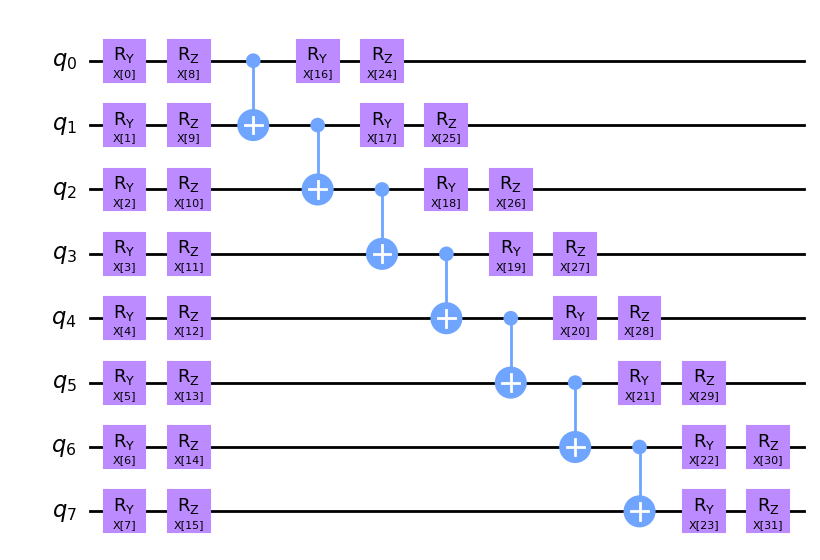

In [6]:
testCircuit = encode_arb(8,32) #Arbitrary encoding for 32 features on 8 qubits
testCircuit.draw('mpl')